# WeatherPy
----



### Analysis

#### * Latitude vs. Temperature

_As we move away from equator ( 0 degrees latitude), northwards or southwards, temperature on the whole decreses with highest temp at 115 degrees Farenheit and lowest at 26 degrees. But we can see that temperatures between 20 and 40 degrees latitude reporting highest temperatures and not at equator.This might be because data is not collected at the same local time from all cities but at US CST. This means it could be day, night, noon or evening etc at these cities. More accurate would've been to collect data from different cities for the same local time. Like 12noon local time from all cities._

* Latitude vs. Humidity

_Unable to see a specific trend for Humidity as latitude changes and high and low values everywhere as we go away from the equator. Humidity is the amount of water vapour in the air and ideally as temperature increases, relative humidity decreases. But when this data was collected, time of different cities are different and so humidity level could be different. Like less humidity in the air in the noon Vs more in the morning. But the local weather conditions like cloudiness, wind etc can affect the humidity and also presence of water bodies nearby._

* Latitude vs. Cloudiness

_On the whole, we see scattered clouds as we go north or south from equator. No specific trend is seend in Cloudiness but see high Cloudiness near equator also as we go away from 0 degrees latitude. High humidy indicators could be linked with cloudiness also._

* Latitude vs. Wind Speed

_It doesn't seem like a windy day as the highest reported is less than 35mph. Wind speed, a factor of Air pressure and can change based on temperature increase or decrease. Also during the days, typically more windy than nights but the data was collected at a time when it's day time in Austin and evening in most of the places close to equator. So basically do not see any specific trend for wind speed for this day as we move away from 0 latitude but on the whole not a windy weather._

* Correlation Table

_Basically no strong correlation can be found between latitude and other weather inidcators for today. A slight positive correlation (0.428875) can be found between Humidy and Cloudiness and a slight negative correlation between Maximum Temperature and Humidity (-0.496278)._

![corr.png](Images\corr_table.png)


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import strftime, localtime
from pprint import pprint
import os
import math
import gmaps

# Import API key
from api_keys import api_key,gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

if not os.path.exists("output_data"):
    os.makedirs("output_data")



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = set()

# Setting a random seed
np.random.seed(1234)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Using a cities as a set type variable to keep unique values
    cities.add(city)

# Print the city count to confirm sufficient count
cities = list(cities)
print(f"Total number of Cities being analyzed for weather is {len(cities)}")


Total number of Cities being analyzed for weather is 608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Iterate over Cities List and query the API to gather weather data
# like Temperature, Humidity, Cloudiness and Wind Speed.
print(f"Beginning Data Retrieval")
city_record = 1
city_set = 1
city_name = []
city_cloudiness = []
city_country = []
city_weather_date = []
city_humidity = []
city_latitude = []
city_longitude = []
city_max_temp = []
city_wind_speed = []
for city in cities:
    baseURL = "http://api.openweathermap.org/data/2.5/weather"
    params = { "q" : city,
               "units" : "imperial",
               "appid" : api_key}
    
    # Querying the OpenWeather API
    try:
        print(f'Processing Record {city_record} of Set {city_set} | {city}')
        weather_data = requests.get(baseURL, params=params).json()
        # Extracting weather data for city
        city_name.append(weather_data["name"])
        city_cloudiness.append(weather_data["clouds"]["all"])
        city_country.append(weather_data["sys"]["country"])
        city_weather_date.append(weather_data["dt"])
        city_humidity.append(weather_data["main"]["humidity"])
        city_latitude.append(weather_data["coord"]["lat"])
        city_longitude.append(weather_data["coord"]["lon"])
        city_max_temp.append(weather_data["main"]["temp_max"])  
        city_wind_speed.append(weather_data["wind"]["speed"])
        
    except Exception as e:
        print(f'City not found, Skipping...')
    city_record += 1
    if city_record > 50:
        city_record = 1
        city_set += 1
        

    

Beginning Data Retrieval
Processing Record 1 of Set 1 | sterling
Processing Record 2 of Set 1 | berlevag
Processing Record 3 of Set 1 | pokrovsk-uralskiy
City not found, Skipping...
Processing Record 4 of Set 1 | sao joao dos patos
Processing Record 5 of Set 1 | sanda
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | oxapampa
Processing Record 8 of Set 1 | auki
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | bowen
Processing Record 11 of Set 1 | zalantun
Processing Record 12 of Set 1 | crab hill
City not found, Skipping...
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | ankazoabo
Processing Record 15 of Set 1 | petatlan
Processing Record 16 of Set 1 | taolanaro
City not found, Skipping...
Processing Record 17 of Set 1 | havoysund
Processing Record 18 of Set 1 | paamiut
Processing Record 19 of Set 1 | adrar
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | iskateley
Processing Reco

Processing Record 36 of Set 4 | grindavik
Processing Record 37 of Set 4 | lososina
Processing Record 38 of Set 4 | freeport
Processing Record 39 of Set 4 | areosa
Processing Record 40 of Set 4 | west wendover
Processing Record 41 of Set 4 | galiwinku
City not found, Skipping...
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | manglaur
Processing Record 44 of Set 4 | barrow
Processing Record 45 of Set 4 | baturaja
Processing Record 46 of Set 4 | belmonte
Processing Record 47 of Set 4 | kathu
Processing Record 48 of Set 4 | pemangkat
City not found, Skipping...
Processing Record 49 of Set 4 | dobryanka
Processing Record 50 of Set 4 | sola
Processing Record 1 of Set 5 | pandaria
Processing Record 2 of Set 5 | williams lake
Processing Record 3 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 5 | fairbanks
Processing Record 5 of Set 5 | celestun
Processing Record 6 of Set 5 | santa lucia
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Se

Processing Record 25 of Set 8 | tam ky
Processing Record 26 of Set 8 | egvekinot
Processing Record 27 of Set 8 | chagda
City not found, Skipping...
Processing Record 28 of Set 8 | mugur-aksy
Processing Record 29 of Set 8 | ust-kut
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | qunduz
City not found, Skipping...
Processing Record 32 of Set 8 | soyo
Processing Record 33 of Set 8 | marzuq
Processing Record 34 of Set 8 | brae
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | barentsburg
City not found, Skipping...
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | lebu
Processing Record 39 of Set 8 | anloga
Processing Record 40 of Set 8 | saleaula
City not found, Skipping...
Processing Record 41 of Set 8 | pisco
Processing Record 42 of Set 8 | kaeo
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | kamaishi
Processing Record 45 of Set 8 | victor harbor
Processing Record 46 of Set 8 | palana
Proc

Processing Record 9 of Set 12 | emerald
Processing Record 10 of Set 12 | port macquarie
Processing Record 11 of Set 12 | huittinen
Processing Record 12 of Set 12 | kemlya
Processing Record 13 of Set 12 | arraial do cabo
Processing Record 14 of Set 12 | broadstairs
Processing Record 15 of Set 12 | panji
Processing Record 16 of Set 12 | surgut
Processing Record 17 of Set 12 | ponta delgada
Processing Record 18 of Set 12 | mount pleasant
Processing Record 19 of Set 12 | albany
Processing Record 20 of Set 12 | la sarre
Processing Record 21 of Set 12 | tasiilaq
Processing Record 22 of Set 12 | asau
City not found, Skipping...
Processing Record 23 of Set 12 | bredasdorp
Processing Record 24 of Set 12 | nabire
Processing Record 25 of Set 12 | klaksvik
Processing Record 26 of Set 12 | kodinsk
Processing Record 27 of Set 12 | clyde river
Processing Record 28 of Set 12 | batagay-alyta
Processing Record 29 of Set 12 | wuan
Processing Record 30 of Set 12 | oranjemund
Processing Record 31 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
# Creating a Dataframe for all the City Weather Data
city_weather_data = pd.DataFrame({"City" : city_name,
                               "Cloudiness" : city_cloudiness,
                               "Country" : city_country,
                               "Date" : city_weather_date,
                               "Humidity" : city_humidity,
                               "Lat" : city_latitude,
                               "Lng" : city_longitude,
                               "Max Temp" : city_max_temp,
                               "Wind Speed" : city_wind_speed})
# Writing the Cities Weather data to a csv file
city_weather_data.to_csv(output_data_file)

# Viewing the summary of date count
print(f'Number of cities for which weather data is available')
city_weather_data.count()

Number of cities for which weather data is available


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

### Finding the Date, Maximum temp and Wind speed for analysis and calculating ticks.

In [5]:
# Getting the date for the Weather collection as the latest date of all the collected data.
weather_date = strftime('%m/%d/%y', localtime(city_weather_data["Date"].max()))

# Calculating the min and max temperatures reported
min_temp = math.floor(city_weather_data["Max Temp"].min())
max_temp = math.ceil(city_weather_data["Max Temp"].max())
print(f'Minimum teperature reported is {min_temp}\
      and maximum is {max_temp} degrees Farenheit')

# Calculating highest and lowest wind speed
min_wind_speed = math.floor(city_weather_data["Wind Speed"].min())
max_wind_speed = math.ceil(city_weather_data["Wind Speed"].max())
print(f'Minimum wind speed reported is {min_wind_speed} and\
      maximum is {max_wind_speed} MPH')

Minimum teperature reported is 28      and maximum is 115 degrees Farenheit
Minimum wind speed reported is 0 and      maximum is 32 MPH


In [6]:
# Viewing the Weather Data
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sterling,40,US,1561647510,48,39.00,-77.40,90.00,3.18
1,Berlevag,75,NO,1561647511,57,70.86,29.09,50.00,20.80
2,Sao Joao dos Patos,4,BR,1561647511,49,-6.50,-43.70,85.99,10.27
3,Sanda,75,JP,1561647511,94,34.89,135.23,75.20,4.70
4,Saldanha,74,PT,1561647512,39,41.42,-6.55,84.55,10.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

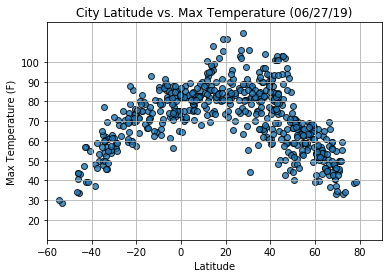

In [7]:
# Latitude vs. Temperature Plot
fig, ax = plt.subplots()
ax.scatter(city_weather_data["Lat"],city_weather_data["Max Temp"],
           alpha = 0.8, edgecolor="black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title(f"City Latitude vs. Max Temperature ({weather_date})")
ax.set_xlim(-45, 90)
ax.set_xticks(np.arange(-60,90,20))
ax.set_ylim(10 * (min_temp // 10) -10, 10 * (max_temp // 10) + 10)
ax.set_yticks(np.arange(10 * (min_temp // 10) ,
                        10 * (max_temp // 10) ,10))
ax.grid()

# Saving the plot to a file
plt.savefig("Images/LatVsTemp.png")

#### Latitude vs. Humidity Plot

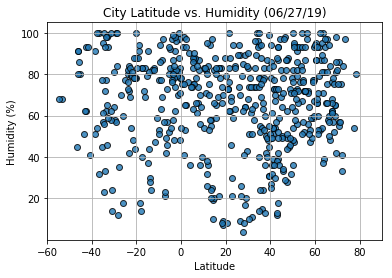

In [8]:
# Latitude vs. Humidity Plot
fig, ax = plt.subplots()

# Humidity already in Percent

# Plotting Scatter plot
ax.scatter(city_weather_data["Lat"],city_weather_data["Humidity"],
           alpha = 0.8, edgecolor="black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"City Latitude vs. Humidity ({weather_date})")
ax.set_xlim(-40, 90)
ax.set_xticks(np.arange(-60,90,20))
ax.set_ylim(0,105)
ax.set_yticks(np.arange(20,105,20))
ax.grid()

# Saving the plot to a file
plt.savefig("Images/LatVsHumidity.png")


#### Latitude vs. Cloudiness Plot

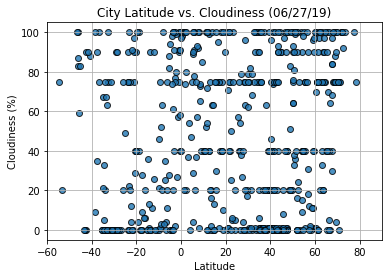

In [9]:
# Latitude vs. Cloudiness Plot
fig, ax = plt.subplots()

# Plotting Scatter plot
ax.scatter(city_weather_data["Lat"],city_weather_data["Cloudiness"],
           alpha = 0.8, edgecolor="black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"City Latitude vs. Cloudiness ({weather_date})")
ax.set_xlim(-45, 90)
ax.set_xticks(np.arange(-60,90,20))
ax.set_ylim(-5,105)
ax.set_yticks(np.arange(0,105,20))
ax.grid()

# Saving the plot to a file
plt.savefig("Images/LatVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

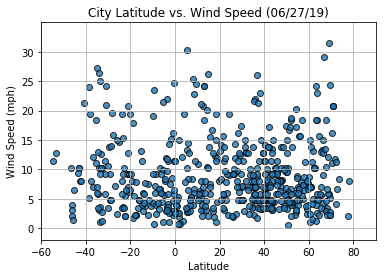

In [10]:
# Latitude vs. Wind Speed Plot
fig, ax = plt.subplots()

# Plotting Scatter plot
ax.scatter(city_weather_data["Lat"],city_weather_data["Wind Speed"],
           alpha = 0.8, edgecolor="black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title(f"City Latitude vs. Wind Speed ({weather_date})")
ax.set_xlim(-45, 90)
ax.set_xticks(np.arange(-60,90,20))
ax.set_ylim(10 * (min_wind_speed // 10) - 2, 
            10 * (max_wind_speed // 10) + 5)
ax.set_yticks(np.arange(10 * (min_wind_speed // 10) ,
                        10 * (max_wind_speed // 10)+5 ,5))
ax.grid()


# Saving the plot to a file
plt.savefig("Images/LatVsWind.png")

In [11]:
# Finding correlation between various features using pandas corr function.
city_weather_corr = city_weather_data[['Lat','Max Temp','Humidity',
                                       'Cloudiness','Wind Speed']].corr()
city_weather_corr.to_csv("output_data/corr_table")
city_weather_corr

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
Lat,1.000000,-0.111890,-0.025451,0.104631,-0.017461
Max Temp,-0.111890,1.000000,-0.496278,-0.302674,0.047640
Humidity,-0.025451,-0.496278,1.000000,0.428875,-0.137294
Cloudiness,0.104631,-0.302674,0.428875,1.000000,-0.131124
Wind Speed,-0.017461,0.047640,-0.137294,-0.131124,1.000000


#### Heatmap of Temperatures- To display the geographic location of cities.

In [12]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [13]:
# Store 'Lat' and 'Lng' into  locations 
locations = city_weather_data[["Lat", "Lng"]].astype(float)

# Convert Maximum Temp to float and store

maximum_temp = city_weather_data["Max Temp"].astype(float)

In [14]:
# Create a Temperature Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=maximum_temp, 
                                 dissipating=False, max_intensity=300,
                                 gradient = ['rgba(0, 255, 255, 0)',                                                                         'rgba(0, 255, 255, 1)',
        'rgba(0, 191, 255, 1)',
        'rgba(0, 127, 255, 1)',
        'rgba(0, 63, 255, 1)',
        'rgba(0, 0, 255, 1)',
        'rgba(0, 0, 223, 1)',
        'rgba(0, 0, 191, 1)',
        'rgba(0, 0, 159, 1)',
        'rgba(0, 0, 127, 1)',
        'rgba(63, 0, 91, 1)',
        'rgba(127, 0, 63, 1)',
        'rgba(191, 0, 31, 1)',
        'rgba(255, 0, 0, 1)'], 
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig



Figure(layout=FigureLayout(height='420px'))